## Performing Linear Regression(OLS)

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(33)

#### OLS estimation with artificial data

In [2]:
n_sample=1000
X=np.linspace(0,10,1000)
X=np.column_stack((X,X**2))
beta = np.array([1,0.1,10])   #Here beta is the coefficients of x and x^2



e=np.random.normal(size=n_sample)

In [3]:
#Our model needs an intercept so we add a column of 1s:

X = sm.add_constant(X)
y = np.dot(X,beta) + e
np.shape(y)
#np.shape(beta)


(1000,)

### Fit and summary

In [4]:
model =  sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.768e+07
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:58:14   Log-Likelihood:                -1384.3
No. Observations:                1000   AIC:                             2775.
Df Residuals:                     997   BIC:                             2789.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9326      0.092     10.182      0.0

In [5]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [6]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [0.93259525 0.12386822 9.99820614]
R2:  0.9999895450933209


### OLS non-Linear curve but linear in parameters

In [7]:
nsample = 50

sig=0.5
x = np.linspace(0,11, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.22,0.3,0.43,5.0])
y_true=np.dot(X,beta)

In [8]:
y_true

array([15.75      , 14.92253447, 14.13505776, 13.38438662, 12.66766574,
       11.98251102, 11.32712925, 10.7004081 , 10.10197192,  9.53220059,
        8.99221048,  8.48379841,  8.00935147,  7.57172727,  7.17411045,
        6.81985294,  6.51230572,  6.25465062,  6.04974069,  5.899957  ,
        5.80708914,  5.77224544,  5.79579729,  5.87736058,  6.01581492,
        6.20935987,  6.45560533,  6.75169145,  7.09443216,  7.48047507,
        7.90646971,  8.36923563,  8.86592207,  9.39415098,  9.95213639,
       10.53877401, 11.15369667, 11.79729272, 12.47068659, 13.1756823 ,
       13.91467298, 14.69052071, 15.50641298, 16.36570264, 17.27173967,
       18.22770309, 19.23644138, 20.30032956, 21.42115   , 22.60000294])

In [9]:
y = y_true + sig*np.random.normal(size=nsample)

In [10]:
np.random.normal?


Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int 

In [11]:
res=sm.OLS(y,X).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1601.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.62e-46
Time:                        23:58:15   Log-Likelihood:                -30.217
No. Observations:                  50   AIC:                             68.43
Df Residuals:                      46   BIC:                             76.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2151      0.022      9.679      0.0

In [12]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.990   
Dependent Variable: y                AIC:                68.4347 
Date:               2023-10-15 23:58 BIC:                76.0828 
No. Observations:   50               Log-Likelihood:     -30.217 
Df Model:           3                F-statistic:        1601.   
Df Residuals:       46               Prob (F-statistic): 1.62e-46
R-squared:          0.991            Scale:              0.21314 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
x1          0.2151     0.0222    9.6787   0.0000    0.1704   0.2599
x2          0.1926     0.0969    1.9877   0.0528   -0.0024   0.3877
x3          0.4290     0.0070   61.5281   0.0000    0.4150   0.4430
const       5.0125     0.1389   36.0856   0.0000    4.7329   5.2921
-----------------------------------------------------------------
Omnibus:              1.065        Durbin-Watson:           2.507
Prob(Omnibus):        0.587        Jarque-Bera (JB):        0.920
Skew:                 0.062        Prob(JB):                0.631
Kurtosis:             2.347        Condition No.:           34   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [13]:
print("parameters", res.params)
print('Standard errors', res.bse)
print('Predicted values', res.predict())

parameters [0.21514165 0.19260505 0.42900944 5.01250538]
Standard errors [0.0222284  0.09689938 0.00697258 0.13890614]
Predicted values [15.73774132 14.88745184 14.07825112 13.30809543 12.57515163 11.87788909
 11.21515654 10.58623983  9.9908978   9.42937433  8.90238616  8.41108687
  7.95700901  7.54198722  7.16806609  6.83739762  6.55213319  6.31431558
  6.12577652  5.98804467  5.902269    5.86916106  5.8889593   5.9614171
  6.08581516  6.26099758  6.48542985  6.75727592  7.07449027  7.43492061
  7.83641587  8.27693417  8.75464526  9.26802241  9.81591897 10.39762598
 11.01290771 11.66201349 12.34566522 13.06502112 13.8216176  14.61729218
 15.45409128 16.33416748 17.25967153 18.23264441 19.25491489 20.32800779
 21.45306739 22.63080009]


In [14]:
#Now draw a plot to compare the true relationship to OLS predictions. Confidence intereval s around the predictions are built using the wls_prediction_std

pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
import matplotlib.pyplot as plt


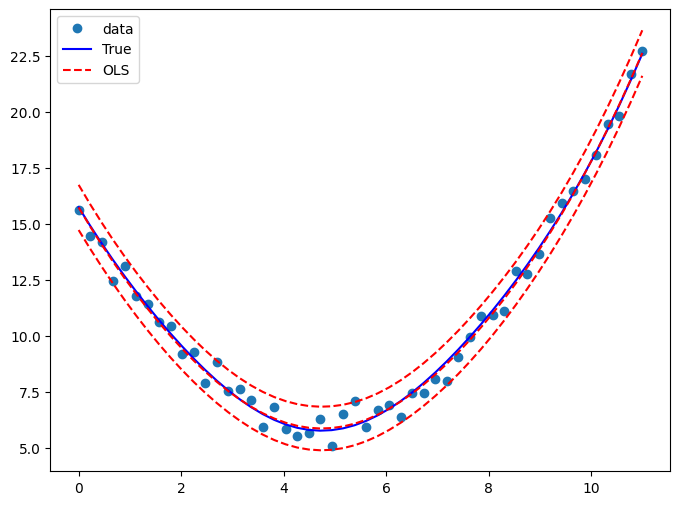

In [15]:
pred_ols=res.get_prediction()
iv_l = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x,y,"o",label="data")
# plt.xlim((4,6))
# plt.ylim((4,10))
ax.plot(x,y_true,'b-',label=True)
ax.plot(x,res.fittedvalues,"r--",label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc='best')

OLS with dummy variables

In [16]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [17]:
X

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.40816327,  0.        ,  0.        ,  1.        ],
       [ 0.81632653,  0.        ,  0.        ,  1.        ],
       [ 1.2244898 ,  0.        ,  0.        ,  1.        ],
       [ 1.63265306,  0.        ,  0.        ,  1.        ],
       [ 2.04081633,  0.        ,  0.        ,  1.        ],
       [ 2.44897959,  0.        ,  0.        ,  1.        ],
       [ 2.85714286,  0.        ,  0.        ,  1.        ],
       [ 3.26530612,  0.        ,  0.        ,  1.        ],
       [ 3.67346939,  0.        ,  0.        ,  1.        ],
       [ 4.08163265,  0.        ,  0.        ,  1.        ],
       [ 4.48979592,  0.        ,  0.        ,  1.        ],
       [ 4.89795918,  0.        ,  0.        ,  1.        ],
       [ 5.30612245,  0.        ,  0.        ,  1.        ],
       [ 5.71428571,  0.        ,  0.        ,  1.        ],
       [ 6.12244898,  0.        ,  0.        ,  1.        ],
       [ 6.53061224,  0.

In [22]:
res2 = sm.OLS(y,X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     726.1
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           9.87e-39
Time:                        23:59:06   Log-Likelihood:                -63.751
No. Observations:                  50   AIC:                             135.5
Df Residuals:                      46   BIC:                             143.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9490      0.059     16.124      0.0

## Joint hypothesis test

In [19]:
#F-test

In [20]:
def

SyntaxError: invalid syntax (1102136943.py, line 1)